In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)



In [2]:

df = pd.read_csv('../data/microbes.csv')
df

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,1.75,2.970,3.12,3.12,2.97,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,1.77,3.950,6.08,6.08,5.49,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,1.51,3.490,5.95,5.95,5.99,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,3.34,3.630,8.93,8.93,8.90,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,8.40,17.100,10.20,10.20,10.20,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,2.73,8.690,20.00,20.00,20.10,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,1.60,2.300,19.00,19.00,19.20,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,1.70,0.633,19.90,19.90,20.10,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,1.71,0.499,20.10,20.10,20.20,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [3]:
#missing values
df.drop('Unnamed: 0', axis=1, inplace=True)
df.isna().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [4]:
df.microorganisms.value_counts()

Ulothrix          7420
Volvox            4320
Aspergillus sp    3888
Protozoa          3888
Yeast             3600
Raizopus          2552
Diatom            1818
Pithophora        1350
Penicillum        1080
Spirogyra          611
Name: microorganisms, dtype: int64

In [5]:
df.microorganisms.value_counts(normalize=True)
#will have to deal with this imbalance

Ulothrix          0.243064
Volvox            0.141514
Aspergillus sp    0.127363
Protozoa          0.127363
Yeast             0.117928
Raizopus          0.083598
Diatom            0.059554
Pithophora        0.044223
Penicillum        0.035379
Spirogyra         0.020015
Name: microorganisms, dtype: float64

In [6]:
df.describe()
#all of the columns have a max of 23, seems too high?

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,2.085481,2.640499,11.113760,11.113760,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,2.166312,2.488448,6.033357,6.033357,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,0.849000,1.150000,5.980000,5.980000,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,1.500000,1.940000,11.100000,11.100000,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,2.660000,3.380000,16.000000,16.000000,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


In [7]:
#df.sort_values(by='Solidity', ascending=False).head(30)
df.loc[df.MinorAxisLength == 23]

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,BoundingBox3,BoundingBox4,ConvexHull1,ConvexHull2,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
4112,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4121,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4130,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4148,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4652,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4661,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4670,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox
4688,0.0241,14.7,6.73,3.64,0.847,0.0459,2.58,21.6,1.06,0.0,21.9,23.0,3.64,3.64,1.06,1.07,18.0,23.0,7.19,23.0,12.4,9.69,2.0,9.05,Volvox


In [8]:
#df.loc[df.duplicated(keep=False)].head(30)
#Not addressing this duplicate stuff yet. may or may not be a problem later

<AxesSubplot:>

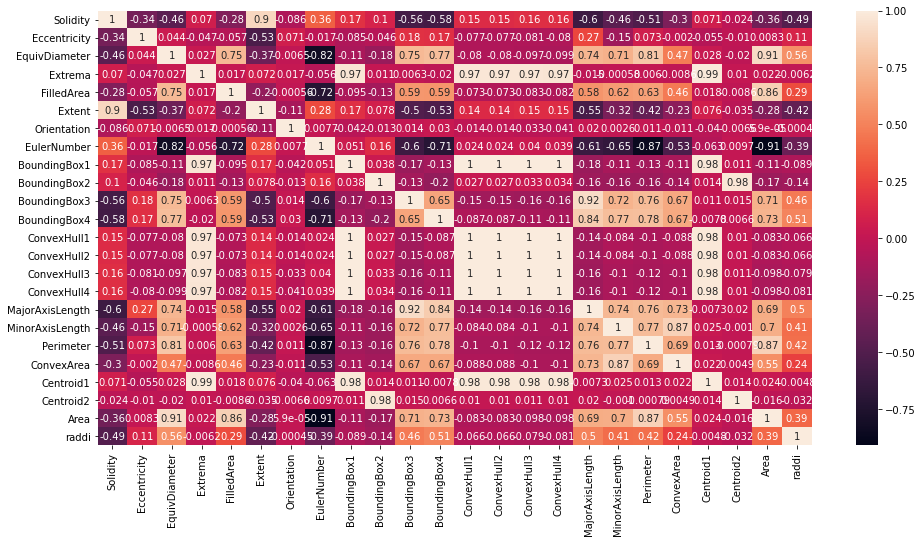

In [9]:
plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [89]:
#split and run a baseline tree
X = df.drop('microorganisms', axis=1)
y = df.microorganisms
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [90]:
clf = DecisionTreeClassifier()

score = -cross_val_score(clf, X_train, y_train, scoring='neg_log_loss', cv=20)
print(score)
print(np.mean(score))

[0.8144515  0.48263792 0.69379201 0.39214331 0.72395689 0.33181357
 0.63346227 0.48263792 0.6032974  0.51280279 0.39214331 0.72395689
 0.6032974  0.6032974  0.48263792 0.3924861  0.69439848 0.54344229
 0.634016   0.60382476]
0.5672248075155821


In [91]:
def getScore(estimator, data, target, labels = None):
    preds = estimator.predict(data)
    results = {}
    results['accuracy'] = accuracy_score(target, preds)
    results['f1'] = f1_score(target, preds, average=None)
    results['recall'] = recall_score(target, preds, average=None)
    results['precision'] = precision_score(target, preds, average=None)
    
    dfResults = pd.DataFrame(results, index=labels)
    #print(dfResults)
    return dfResults

In [92]:
def getConfusionMatrix(estimator, data, target, labels=None):
    preds = estimator.predict(data)
    matrix_raw = confusion_matrix(target, preds)
    dfMatrix = pd.DataFrame(matrix_raw, index=labels, columns=labels)
    plt.subplots(figsize=(16,8))
    sns.heatmap(dfMatrix, annot=True, robust=True, fmt='g')

In [93]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

labels = y_test.value_counts().index
labels = labels.sort_values()

testResults = getScore(clf, X_test,y_test, labels)
testResults

,accuracy,f1,recall,precision
Aspergillus sp,0.983884,0.983829,0.985371,0.982292
Diatom,0.983884,0.978402,1.000000,0.957717
Penicillum,0.983884,0.990512,1.000000,0.981203
Pithophora,0.983884,0.928675,0.908832,0.949405
Protozoa,0.983884,0.995349,1.000000,0.990741
Raizopus,0.983884,0.999261,1.000000,0.998523
Spirogyra,0.983884,0.876494,0.791367,0.982143
Ulothrix,0.983884,0.982885,0.976255,0.989606
Volvox,0.983884,0.992661,1.000000,0.985428
Yeast,0.983884,0.988379,0.995541,0.981319


In [94]:

#getConfusionMatrix(clf, X_test, y_test, y_test.value_counts().index)

In [95]:
y_test.value_counts()
#y_test.head()

Ulothrix          1853
Volvox            1082
Protozoa           963
Aspergillus sp     957
Yeast              897
Raizopus           676
Diatom             453
Pithophora         351
Penicillum         261
Spirogyra          139
Name: microorganisms, dtype: int64

In [96]:
#as I figured, the labeling is no good here. class imbalance also an issue
#.value_counts must sort by count automatically
#it seems like confusion matrix does it alphabetically

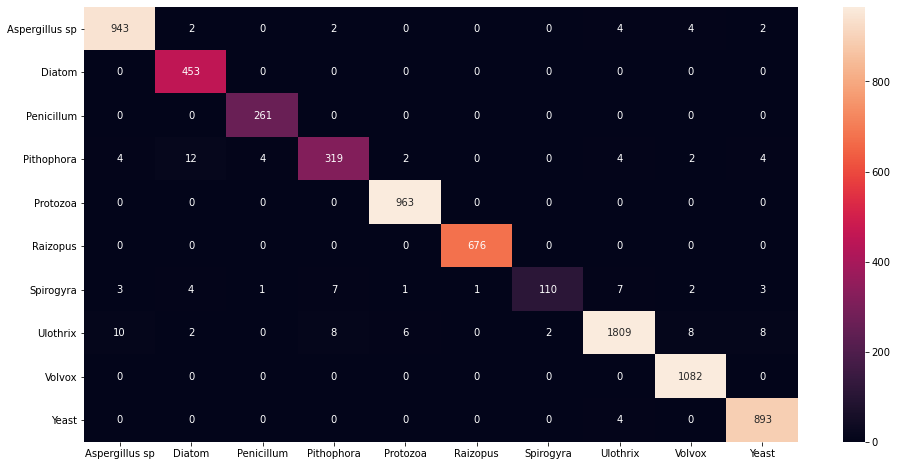

In [97]:
#maybe this will fix the labels

#labels
getConfusionMatrix(clf, X_test, y_test, labels)

# i wonder if theres any way to scale the colors to ignore the diagonals?
# https://stackoverflow.com/questions/68632474/seaborn-heatmap-doesnt-adjust-colors-based-on-specific-value
# figure this out later

In [ ]:
#think the labels are good now
#results look pretty good for a baseline, imbalance is causing a few classes to underperform